In [309]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata

In [310]:
coors, labels = skdata.make_moons(n_samples=200, noise=0.1)

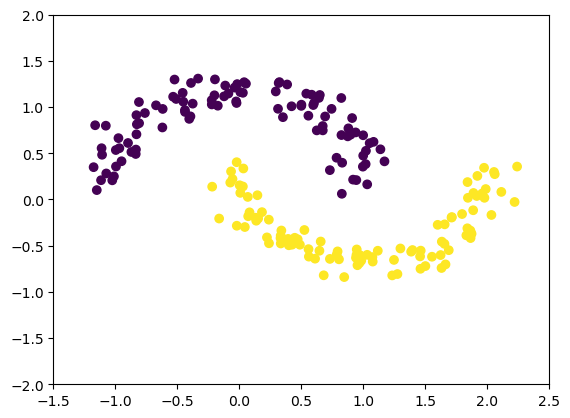

In [311]:
plt.xlim(-1.5, 2.5)
plt.ylim(-2, 2)
coors[labels == 0, 1] += 0.2
coors[labels == 1, 1] -= 0.2
# plt.scatter(X_back, Y_back, c='red', alpha=0.2, s=1)
plt.scatter(coors[:, 0], coors[:, 1], c=labels)

In [312]:
def softmax(Z):
    exp_res = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    returned_res = exp_res / np.sum(exp_res, axis=1, keepdims=True)
    return returned_res

def reLU(Z):
    returned_A = Z.copy()
    returned_A[Z < 0] = 0
    return returned_A

def reLU_grad(Z):
    returned_res = Z.copy()
    returned_res[Z <= 0] = 0
    returned_res[Z > 0] = 1
    return returned_res

def MNN_loss(A, y):
    losses = A[range(A.shape[0]), y]
    losses[losses == 0] = 0.0001
    return -np.mean(np.log(losses))

def MNN_fit(X, y, learning_rate=0.01, epochs=1000, tolerance=1e-5, batch_size=200):
    hidden_units = 20
    N = X.shape[0]
    batch_num = int(np.ceil(N / batch_size))
    losses = list()
    W_1 = np.random.rand(2, hidden_units)
    W_2 = np.random.rand(hidden_units, 2)
    b_1 = np.zeros((1, hidden_units)) 
    b_2 = np.zeros((1, 2))
    for it in range(epochs):
        Z_1 = X.dot(W_1) + b_1
        A_1 = reLU(Z_1)
        Z_2 = A_1.dot(W_2) + b_2
        A_2 = softmax(Z_2)
        losses.append(MNN_loss(A_2, y))

        E_2 = A_2.copy()
        E_2[range(X.shape[0]), y] -= 1
        E_2 /= N
        W_2 -= learning_rate * (A_1.T).dot(E_2)
        b_2 -= learning_rate * np.sum(E_2, axis=0, keepdims=True)

        E_1 = np.multiply(E_2.dot(W_2.T), reLU_grad(Z_1))
        W_1 -= learning_rate * (X.T).dot(E_1)
        b_1 -= learning_rate * np.sum(E_1, axis=0, keepdims=True)

    return W_1, W_2, b_1, b_2, losses
            
        

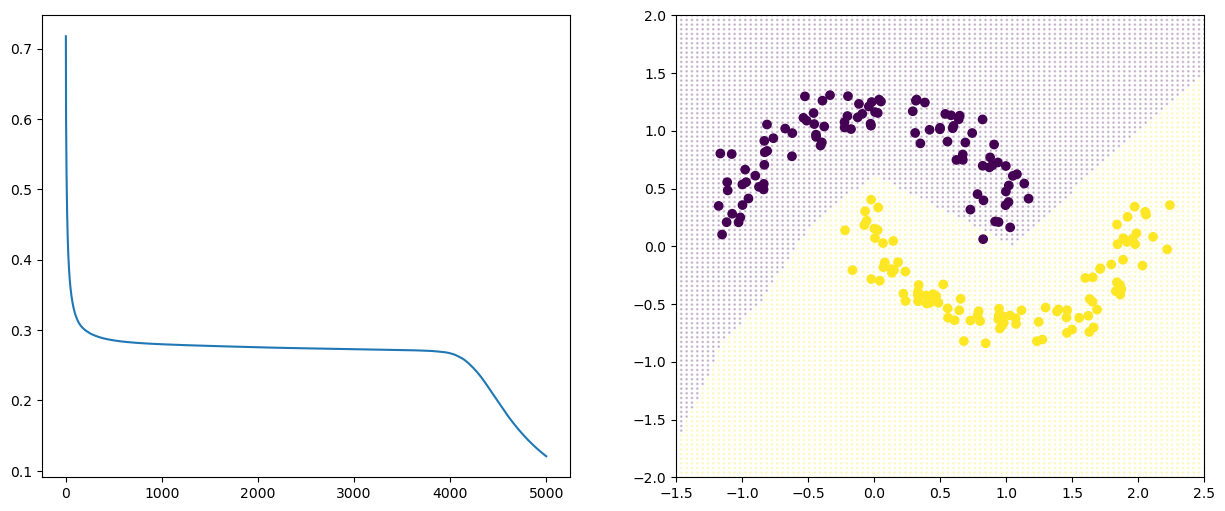

In [313]:
W_1, W_2, b_1, b_2, loss_hist = MNN_fit(X, y, learning_rate=0.1, epochs=5000)
# print(W_1)
# print(W_2)
# print(b_1)
# print(b_2)

fig, ax = plt.subplots(1, 2, figsize=(15, 6)) 

ax[0].plot(loss_hist)

X_back, Y_back = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-2, 2, 100))
X_back = X_back.reshape(X_back.shape[0] * X_back.shape[1], 1)
Y_back = Y_back.reshape(Y_back.shape[0] * Y_back.shape[1], 1)
coor_back = np.concatenate([X_back, Y_back], 1)

Z_1 = coor_back.dot(W_1) + b_1
A_1 = reLU(Z_1)
Z_2 = A_1.dot(W_2) + b_2
A_2 = softmax(Z_2)
colors = np.argmax(A_2, 1)

plt.xlim(-1.5, 2.5)
plt.ylim(-2, 2)
ax[1].scatter(X_back, Y_back, c=colors, alpha=0.2, s=1)
ax[1].scatter(coors[:, 0], coors[:, 1], c=labels)